<a href="https://colab.research.google.com/github/junheeyoon/Big-Data-analyst-Study/blob/master/3_3_ML_%EA%B3%A0%EA%B8%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference
[Kaggle: Titanic](https://www.kaggle.com/c/titanic)

[Notebook: Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

# Workflow


#### Workflow stages

1. 문제 정의 Question or problem definition.
1. 데이터 수집 Acquire training and testing data.
1. 데이터 탐색(컬럼 탐색 분석, 패턴 분석 등) Analyze, identify patterns, and 
1. 데이터 전처리 Wrangle, prepare, cleanse the data.
explore the data.
1. 데이터 모델링 Model, predict and solve the problem.

\+ 결과 생성 및 시각화 Visualize, report, and present the problem solving steps and final solution.



#### Workflow goals
1. 데이터 전처리
    1. 데이터 변형 Converting
    1. 데이터 정합성 확인? Completing
    1. 중요 변수 선택 Correlating
1. 모델 성능 Correcting
1. 시각화 Charting

# 1. 문제정의
> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

  - training data를 통해 생사여부를 판단할 수 있는 모델을 완성
  - test data를 통해 검증

# 2. 데이터 수집

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from statistics import mode
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

# 현재 경로 확인
import os
print(os.path.abspath(os.curdir))

# Root 경로 설정
os.chdir('/content/drive/My Drive/Colab Notebooks/3days_ml/')

# 변경된 경로 확인
print(os.path.abspath(os.curdir))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/3days_ml
/content/drive/My Drive/Colab Notebooks/3days_ml


In [ ]:
train = pd.read_csv("./data/Titanic/train.csv")
test = pd.read_csv("./data/Titanic/test.csv")
gender_submission = pd.read_csv("./data/Titanic/gender_submission.csv")

#### 데이터 확인

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3. 데이터 탐색
변수 | 정의 | 분석 방향 | 설명
---|---|---|---
 Survived| 생사여부| | 0: No, 1:Yes | Y
 Pclass| 탑승 클래스/등급 | 클래스별 생존확률, Pclass, Fare 와의 상관관계
 Name| 이름 | Mr나 Miss, Sir 같은 단어가 영향을 미칠것인가
 Sex| 성별 | 성별간 생존률 확인 | 카테고리변경
 Age| 나이 | 어릴수록?
 SibSp| 자식 숫자 | 자식수와 생존 상관관계
 Parch| 부모 숫자 | 부모수와 생존 상관관계
 Ticket| 티켓 넘버 | Fare와 Corr 높을 듯 / 비용과 생존의 Corr?
 Fare| 요금 | Ticket과 동일 | 카테고리변경
 Cabin| Cabin 여부 및 번호
 Embarked| 탑승 항구 | | C = Cherbourg, Q = Queenstown, S = Southampton

#### Sex
- 사망자:생존자 약 6:4의 비율
- 남성의 경우 여성보다 더 많이 사망
- 생존에 중요한 변수로 추정

Text(0.5, 1.0, 'Number of passenger Survived')

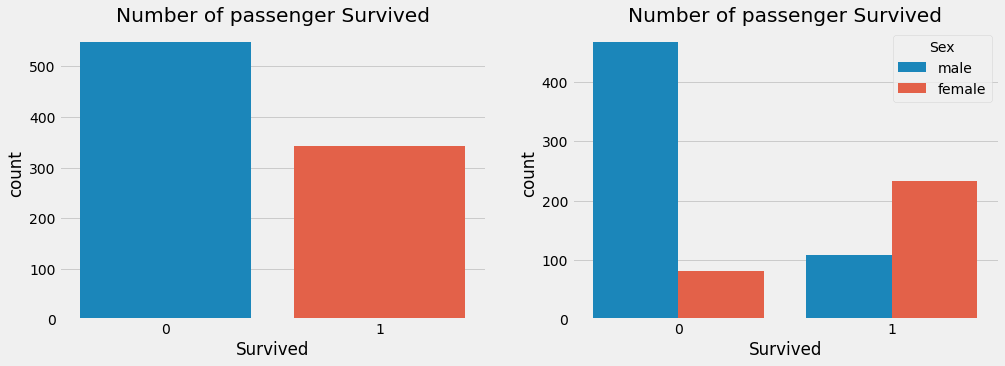

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['Survived'])
plt.title('Number of passenger Survived');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=train)
plt.title('Number of passenger Survived')

#### Pclass
- 탑승 클래스
- 금액이 저렴한 3등급 탑승객들의 수가 과반수 이상
- 사망자수 또한 3등급에서 많이 나옴

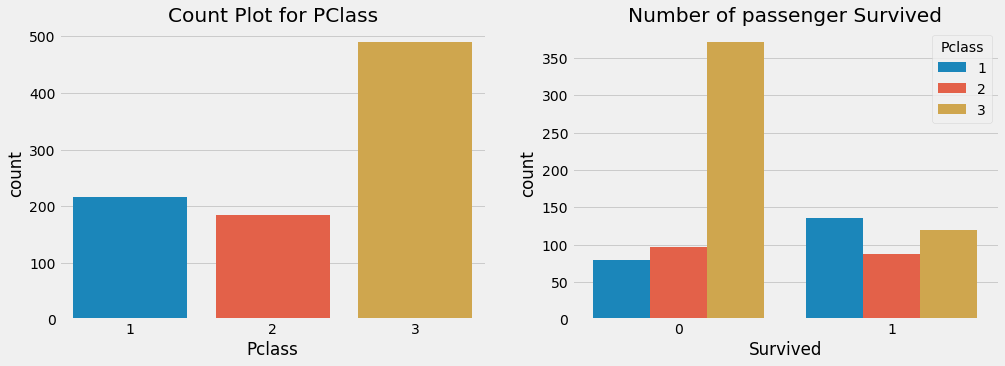

In [ ]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['Pclass'])
plt.title('Count Plot for PClass');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=train)
plt.title('Number of passenger Survived');

#### Age
- 탑승자들의 나이 분포는 주로 20~30대에 몰려있음

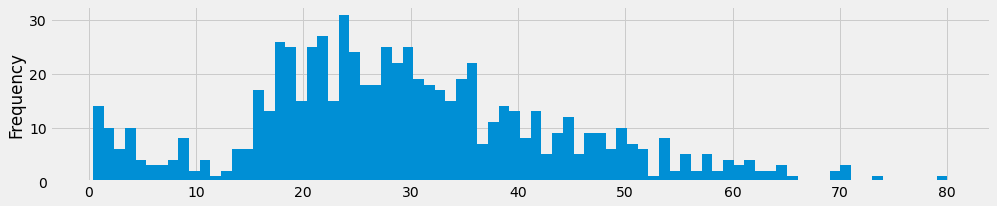

In [ ]:
plt.figure(figsize=(15, 3))
train['Age'].plot(kind='hist', bins = 80)

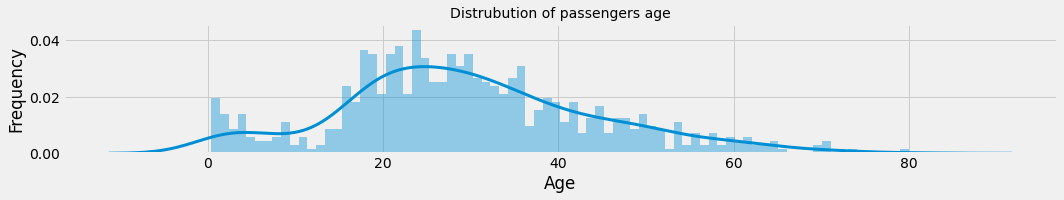

In [ ]:
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(train.loc[train["Age"] > 0, 'Age'], kde_kws={"lw": 3}, bins = 80)

# set titles and labels
plt.title('Distrubution of passengers age',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')

# clean layout
plt.tight_layout()

- 생존자들의 연령 분포가 사망자들의 연령 분포보다 좀 더 낮은 것을 확인 

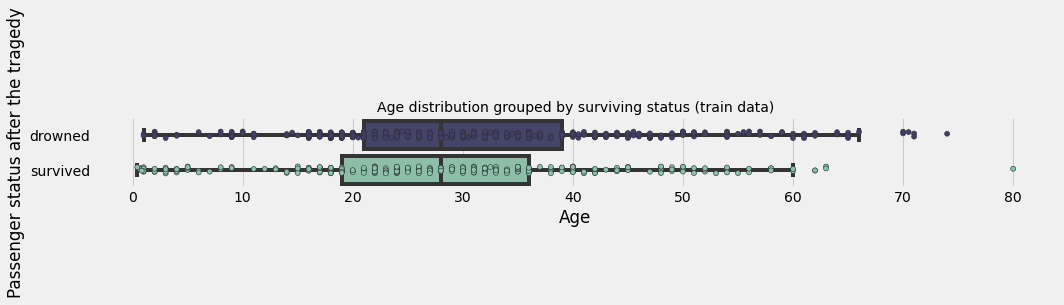

In [ ]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = train, palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data = train, linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

#### SibSp
- 자녀 수가 많을 수록 생존한 것을 확인할 수 있음
- 단, 그 수가 많지는 않음

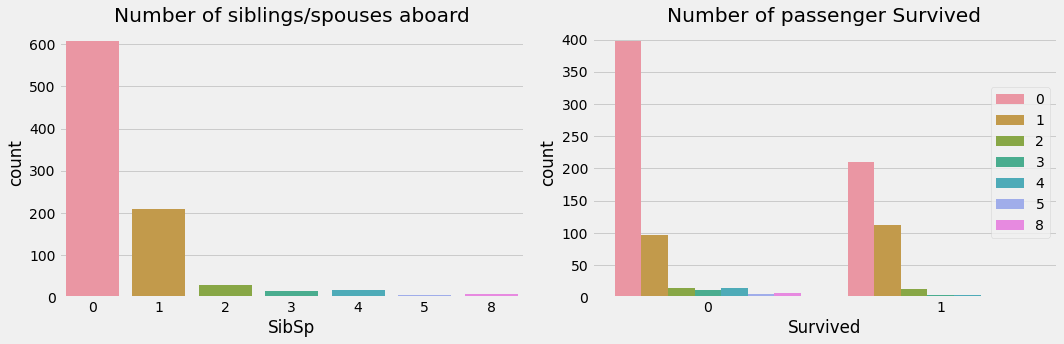

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['SibSp'])
plt.title('Number of siblings/spouses aboard');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="SibSp", data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived');

# clean layout
plt.tight_layout()

#### Embarked

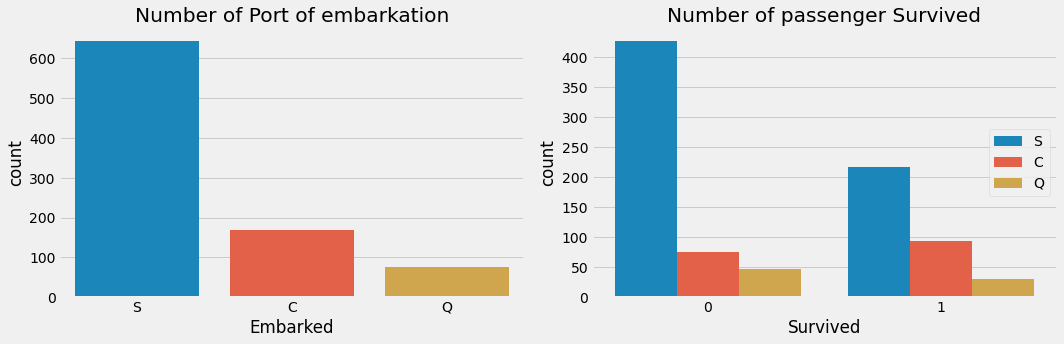

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(train['Embarked'])
plt.title('Number of Port of embarkation');

plt.subplot(1,2,2)
sns.countplot(x='Survived', hue='Embarked', data=train)
plt.legend(loc='right')
plt.title('Number of passenger Survived')

# clean layout
plt.tight_layout()

#### Fare vs Embarked

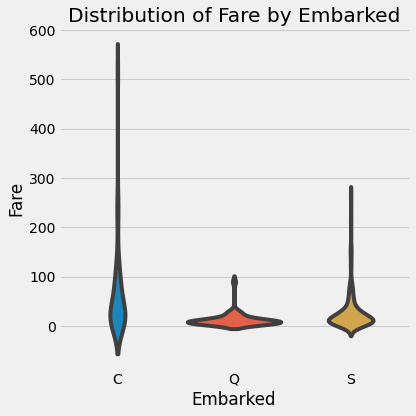

In [ ]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None, data=train, height = 6, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

#### Fare vs Pclass

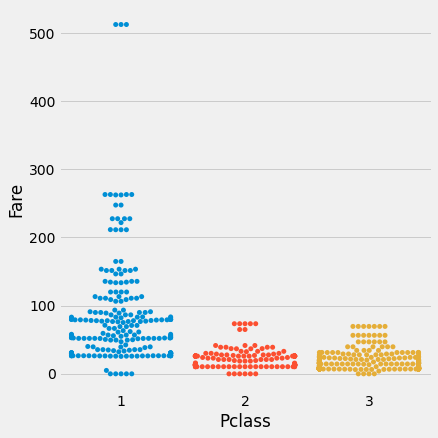

In [ ]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=train, height = 6)

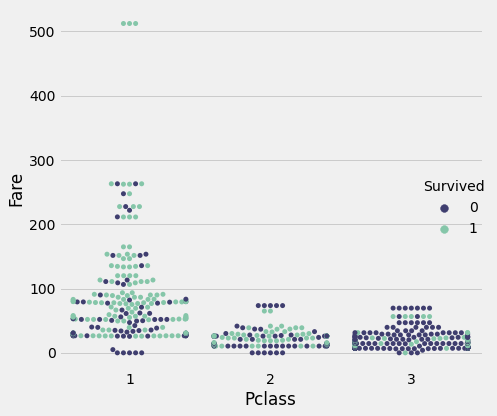

In [ ]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=train, palette=["#3f3e6fd1", "#85c6a9"], height = 6)

plt.tight_layout()

####  Correlation Matrix

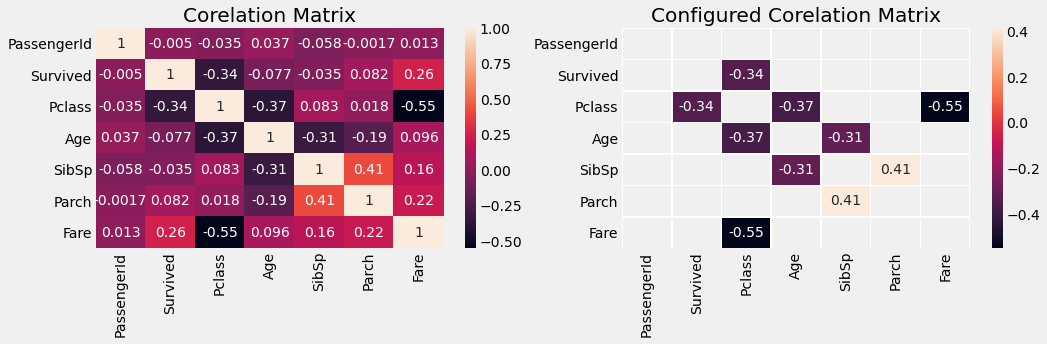

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.heatmap(train.corr(), annot=True)
plt.title('Corelation Matrix');

plt.subplot(1,2,2)
threshold = 0.3
corr = train.corr()
sns.heatmap(corr[((corr >= threshold) | (corr <= -threshold)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Configured Corelation Matrix');

plt.tight_layout()

#### 데이터 결측치 확인

- Age, Cabin, Embarked 결측치 발견

In [ ]:
train.isnull().mean(axis=0)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Text(0.5, 1.0, 'Null Values in Training Set')

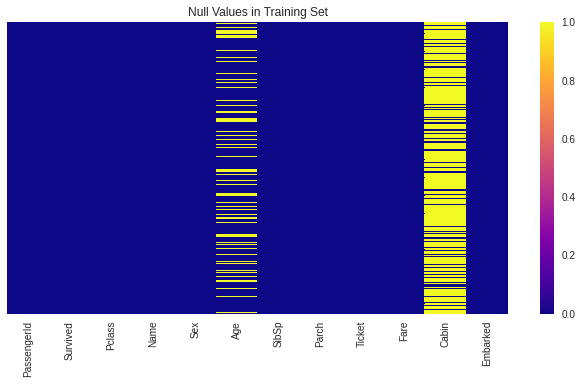

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values in Training Set')

- 결측치 채우기
    1. Embarked : 최빈값으로 채우기
    2. Fare: 중앙값으로 채우기
    3. Cabin: NaN -> U(nknown)

In [ ]:
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')
test.loc[test.Age.isnull(), 'Age'] = test.groupby("Pclass").Age.transform('median')
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))
test['Embarked'] = test['Embarked'].fillna(mode(test['Embarked']))
train['Fare']  = train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
test['Fare']  = test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

# 변수 전처리

#### Sex 변환

In [ ]:
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1

test['Sex'][test['Sex'] == 'male'] = 0
test['Sex'][test['Sex'] == 'female'] = 1

train['Sex'] = train['Sex'].astype(int)
test['Sex'] = test['Sex'].astype(int)

#### Embarked ont hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
# train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
test = test.join(temp)
# test.drop(columns='Embarked', inplace=True)

#### Cabin 등급으로 분류

In [ ]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [ ]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
train['Cabin'] = train['Cabin'].map(cabin_category)
test['Cabin'] = test['Cabin'].map(cabin_category)

#### Name 필요 변수 추출

In [ ]:
train['Name'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [ ]:
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
# train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
# test.drop(columns='Title', inplace=True)

#### SibSp / Parch  전처리

In [ ]:
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

In [ ]:
train['isAlone'] = 0 
test['isAlone'] =  0 
train.loc[train['familySize'] > 1, 'isAlone'] = 0 
test.loc[test['familySize'] > 1, 'isAlone'] = 0 

#### Fare 등급

In [ ]:
train['FareBin'] = pd.qcut(train['Fare'], 4, duplicates='drop', labels=False)
test['FareBin'] = pd.qcut(test['Fare'], 4, duplicates='drop', labels=False)

#### 나이 등급

In [ ]:
train['AgeBin'] = pd.cut(train['Age'], 4, duplicates='drop', labels = False)
test['AgeBin'] = pd.cut(test['Age'], 4, duplicates='drop', labels = False)

#### PCA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Title        891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    object 
 12  S            891 non-null    float64
 13  C            891 non-null    float64
 14  Q            891 non-null    float64
 15  0            891 non-null    float64
 16  1            891 non-null    float64
 17  2            891 non-null    float64
 18  3            891 non-null    float64
 19  4       

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# columns = train.drop(columns=["PassengerId","Survived",'Title','Ticket','Cabin','Embarked']).columns
# X_train = StandardScaler().fit_transform(train.drop(columns=["PassengerId","Survived",'Title','Ticket','Cabin','Embarked']))
# new_df = pd.DataFrame(X_train, columns=columns)

# pca = PCA(n_components = 2)
# df_pca = pca.fit_transform(new_df)

# plt.figure(figsize =(8, 6))
# plt.scatter(df_pca[:, 0], df_pca[:, 1], c = train['Survived'], cmap ='plasma')

# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component');

# plt.tight_layout()

In [ ]:
# fig = plt.figure()
# ax = fig.gca(projection = '3d')

# pca = PCA(n_components = 3)
# df_pca = pca.fit_transform(new_df)

# ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c = target, cmap ='plasma')
# plt.tight_layout()

#### 최종 데이터

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,S,C,Q,0,1,2,3,4,familySize,isAlone,FareBin,AgeBin
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,9,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,0,0,1
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,3,C,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0,3,1
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,9,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,1,1
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,3,S,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2,0,3,1
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,9,S,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,1,1


# 모델링
- 테스트 파이프라인

1. 모델 클래스 선언
2. cross validation 세팅

In [ ]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#### 분류 알고리즘 클래스 선언

In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

#### 테스트 1
- 복수의 분류 알고리즘 테스트 파이프라인
- 각 알고리즘의 train/test 결과

In [ ]:
Target = ['Survived']
Input_col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'S', 'C', 'Q', 0, 1, 2, 3, 4, 'familySize', 'FareBin', 'AgeBin', 'isAlone']

data1 = train
#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[Input_col], data1[Target], cv  = cv_split, return_train_score = True, n_jobs=4)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[Input_col], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[Input_col])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.922097,0.833955,0.0613633,0.342137
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.897004,0.830597,0.0631645,0.21118
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.834831,0.827985,0.0674342,3.96617
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.831461,0.822761,0.0662721,0.00863214
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.852622,0.817537,0.0647805,0.273806
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.833146,0.817537,0.0591168,0.0190806
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.990075,0.813433,0.0453324,0.562702
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.973221,0.810821,0.0872919,0.0831703
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.827154,0.800373,0.0629757,0.25753
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.990262,0.795522,0.0612713,0.427992


#### 테스트2: Voting 분류 알고리즘
- 다양한 알고리즘의 결과를 앙상블한 결과
    - hard voting: 다수결
    - soft voting: 결과 분포 결합

![Image](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbqMaUT%2FbtqznQXVLjj%2FptcExgp4hOjGKOKIEvTIbK%2Fimg.png)


In [ ]:
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[Input_col], data1[Target], cv  = cv_split, return_train_score = True, n_jobs=4)
vote_hard.fit(data1[Input_col], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[Input_col], data1[Target], cv  = cv_split, return_train_score = True, n_jobs=4)
vote_soft.fit(data1[Input_col], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Training w/bin score mean: 93.24
Hard Voting Test w/bin score mean: 83.25
Hard Voting Test w/bin score 3*std: +/- 7.14
----------
Soft Voting Training w/bin score mean: 92.88
Soft Voting Test w/bin score mean: 82.91
Soft Voting Test w/bin score 3*std: +/- 6.50
----------


#### 테스트3: 파라미터 최적화
- 각 모델의 파라미터 범위 설정
- 범위 안에서 모델 성능이 가장 좋은 파리미터를 찾음
- 범위에 따라서 탐색 시간이 증가

- GridSearchCV: CV로 파라미터 Grid search
- vote_est: 파라미터 탐색 후 파라미터가 저장된 모델 클래스를 갖고있음

In [ ]:
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!
import time

#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc', n_jobs=8)
    best_search.fit(data1[Input_col], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)


The best parameter for AdaBoostClassifier is {'learning_rate': 0.05, 'n_estimators': 300, 'random_state': 0} with a runtime of 44.75 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.5, 'n_estimators': 300, 'random_state': 0} with a runtime of 44.08 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100, 'random_state': 0} with a runtime of 70.64 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 50.28 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 300, 'oob_score': True, 'random_state': 0} with a runtime of 114.62 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 10.89 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_st

#### 테스트4: 최적화된 파라미터 개별 성능 측정 및 테스트 1과 비교

In [ ]:
Target = ['Survived']
Input_col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'S', 'C', 'Q', 0, 1, 2, 3, 4, 'familySize', 'FareBin', 'AgeBin', 'isAlone']

#create table to compare MLA metrics
MLA_columns_opt = ['MLA Name', 'MLA Parameters opt','MLA Train Accuracy Mean opt', 'MLA Test Accuracy Mean opt', 'MLA Test Accuracy 3*STD opt' ,'MLA Time opt']
MLA_compare_opt = pd.DataFrame(columns = MLA_columns_opt)

#create table to compare MLA predictions
MLA_predict_opt = data1[Target]

#index through MLA and save performance to table
row_index = 0
for algs in vote_est:
    alg = algs[1]
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare_opt.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare_opt.loc[row_index, 'MLA Parameters opt'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[Input_col], data1[Target], cv  = cv_split, return_train_score = True, n_jobs=8)

    MLA_compare_opt.loc[row_index, 'MLA Time opt'] = cv_results['fit_time'].mean()
    MLA_compare_opt.loc[row_index, 'MLA Train Accuracy Mean opt'] = cv_results['train_score'].mean()
    MLA_compare_opt.loc[row_index, 'MLA Test Accuracy Mean opt'] = cv_results['test_score'].mean()   
    
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare_opt.loc[row_index, 'MLA Test Accuracy 3*STD opt'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[Input_col], data1[Target])
    MLA_predict_opt[MLA_name] = alg.predict(data1[Input_col])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare_opt.sort_values(by = ['MLA Test Accuracy Mean opt'], ascending = False, inplace = True)

In [ ]:
pd.merge(MLA_compare, MLA_compare_opt, on='MLA Name')

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,MLA Parameters opt,MLA Train Accuracy Mean opt,MLA Test Accuracy Mean opt,MLA Test Accuracy 3*STD opt,MLA Time opt
0,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.922097,0.833955,0.0613633,0.342137,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.890075,0.829104,0.0612713,1.06132
1,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.897004,0.830597,0.0631645,0.21118,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.876404,0.826493,0.0660827,0.419976
2,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.834831,0.827985,0.0674342,3.96617,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.834831,0.827985,0.0674342,7.62719
3,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.852622,0.817537,0.0647805,0.273806,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.839139,0.820896,0.0652718,2.20898
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.990075,0.813433,0.0453324,0.562702,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.923034,0.829478,0.0607063,2.82918
5,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.973221,0.810821,0.0872919,0.0831703,"{'base_estimator': None, 'bootstrap': True, 'b...",0.941011,0.830597,0.0711856,2.48312
6,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.990262,0.795522,0.0612713,0.427992,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.901124,0.826493,0.0464923,0.525825
7,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.808801,0.794403,0.0744971,0.00525331,"{'priors': None, 'var_smoothing': 1e-09}",0.808801,0.794403,0.0744971,0.00476086
8,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.79588,0.786567,0.0534039,0.00514092,"{'alpha': 0.25, 'binarize': 0.0, 'class_prior'...",0.796067,0.786194,0.0534625,0.00591915
9,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.798315,0.738806,0.0723727,0.0104395,"{'algorithm': 'brute', 'leaf_size': 30, 'metri...",0.990262,0.739925,0.0785259,0.00647662


#### 테스트5: 파라미터 최적화 후 Voting 분류 알고리즘
- 최적화된 파리미터 저장: vote_est
- 최적화된 파라미터로 hard / soft vote 모델링
- hard vote
    - train 에러: 파라미터 최적화 전보다 감소 -> 오버피팅 감소
    - test 에러 : 파라미터 최적화 전보다 증가 -> 오버피팅 감소로 인한 성능 향상
- soft vote
    - train 에러: 파라미터 최적화 전보다 감소 -> 오버피팅 감소
    - test 에러 : 파라미터 최적화 전보다 감소 -> 오버피팅 감소가 아닌 전체적 성능 하락으로 판단/ 단 모델 분산 감소
    

In [ ]:
start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[Input_col], data1[Target], cv  = cv_split, return_train_score = True, n_jobs=4)
grid_hard.fit(data1[Input_col], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[Input_col], data1[Target], cv  = cv_split, return_train_score = True, n_jobs=4)
grid_soft.fit(data1[Input_col], data1[Target])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)
run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 90.62
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 83.21
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.84
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 90.56
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.61
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 6.05
----------
Total optimization time was 1.42 minutes.


#### 최종 모형
1. 최적 파라미터 반영 개별 모델
2. 최적 파라미터 반영 Voting 모델

In [ ]:
Target = ['Survived']
Input_col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'S', 'C', 'Q', 0, 1, 2, 3, 4, 'familySize', 'FareBin', 'AgeBin', 'isAlone']

MLA_predict_sub = gender_submission

for algs in vote_est:
    alg = algs[1]    
    MLA_name = alg.__class__.__name__
    
    alg.fit(train[Input_col], train[Target])
    MLA_predict_sub[MLA_name] = alg.predict(test[Input_col])


In [ ]:
MLA_predict_sub['vote hard'] = grid_hard.predict(test[Input_col])
MLA_predict_sub['soft hard'] = grid_soft.predict(test[Input_col])

In [ ]:
for col_nm in MLA_predict_sub.columns[2:]:
    sub = pd.DataFrame()
    sub['PassengerId'] = MLA_predict_sub['PassengerId']
    sub['Survived'] = MLA_predict_sub[col_nm]
    sub.to_csv("./data/Titanic/sub_"+col_nm+".csv", index=None)

# 제출

In [ ]:
pd.DataFrame([[col_nm, np.mean(MLA_predict_sub['Survived'] == MLA_predict_sub[col_nm])] for col_nm in MLA_predict_sub.columns[2:]]).sort_values(by=1)

,0,1
9,KNeighborsClassifier,0.650718
5,GaussianProcessClassifier,0.660287
10,SVC,0.674641
1,BaggingClassifier,0.851675
8,GaussianNB,0.887560
4,RandomForestClassifier,0.894737
11,XGBClassifier,0.901914
13,soft hard,0.901914
3,GradientBoostingClassifier,0.904306
12,vote hard,0.911483
